# Ridge Regresyon

### Model

Gerekli Kütüphaneler

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

In [16]:
df = pd.read_csv("Hitters.csv")

df = df.dropna()

df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [8]:
# League division ve new league kategorik değişkenlerini one hot encoding


dms = pd.get_dummies(df[["League","Division","NewLeague"]])

In [9]:
dms

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0
...,...,...,...,...,...,...
317,0,1,1,0,0,1
318,1,0,1,0,1,0
319,1,0,0,1,1,0
320,1,0,1,0,1,0


In [18]:
df = df.drop(["League","Division","NewLeague"],axis=1).astype("float64")

In [20]:
df = pd.concat([df,dms],axis=1)

In [21]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,PutOuts,Assists,Errors,Salary,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,...,632.0,43.0,10.0,475.0,0,1,0,1,0,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,...,880.0,82.0,14.0,480.0,1,0,0,1,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,...,200.0,11.0,3.0,500.0,0,1,1,0,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,...,805.0,40.0,4.0,91.5,0,1,1,0,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,...,282.0,421.0,25.0,750.0,1,0,0,1,1,0


In [32]:
X = df.drop(["Salary"],axis=1)

y = df["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [44]:
# alpha=0.5 seçilirse;
ridge_model = Ridge(alpha=0.5).fit(X_train,y_train)

In [45]:
ridge_model.coef_

array([ -1.77599139,   8.80590215,   7.28968319,  -3.33186878,
        -2.08064704,   5.42438589,   7.56772654,  -0.13715506,
        -0.20992243,  -0.6082945 ,   1.79352164,   0.73050985,
        -0.68659426,   0.26154323,   0.26864028,  -0.51830209,
       -55.15551891,  55.15551891,  49.74175283, -49.74175283,
        23.18706825, -23.18706825])

In [46]:
ridge_model.intercept_

-22.23602563648933

In [39]:
#şimdi kendimiz -2 ile 10 arasında rastgele alpha değerleri oluşturup tek tek modele fit edip katsayıları tekrar kontrol edelim.

In [53]:
coefs = []
alphas = 10**np.linspace(10,-2,100)*0.5

In [54]:
for i in alphas:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train,y_train)
    coefs.append(ridge_model.coef_)
    
coefs

[array([ 1.08705828e-03,  3.59972026e-04,  5.52181028e-05,  1.92813177e-04,
         1.96696069e-04,  1.59478501e-04,  2.78199599e-05,  1.78978518e-02,
         5.28448603e-03,  6.33684784e-04,  2.78574434e-03,  2.70578331e-03,
         1.95710128e-03,  1.87423189e-03,  1.54040667e-04,  2.97933111e-06,
        -2.39984983e-07,  2.39984983e-07,  1.51804508e-06, -1.51804508e-06,
        -3.31089977e-07,  3.31089977e-07]),
 array([ 1.41677983e-03,  4.69820454e-04,  7.18242294e-05,  2.52218183e-04,
         2.55763476e-04,  2.07728851e-04,  3.41731833e-05,  2.22675231e-02,
         6.58971645e-03,  7.96723487e-04,  3.48283639e-03,  3.38849662e-03,
         2.44474193e-03,  2.46055074e-03,  2.00411446e-04,  4.05879986e-06,
        -3.06791354e-07,  3.06791354e-07,  2.00697733e-06, -2.00697733e-06,
        -4.22750654e-07,  4.22750654e-07]),
 array([ 1.84180994e-03,  6.11797854e-04,  9.31516430e-05,  3.29313865e-04,
         3.31574150e-04,  2.69862282e-04,  4.11993224e-05,  2.73092348e-02,


kendi oluşturduğumuz alphas arrayinin içindeki değerleri tek tek alpha olarak atayıp o alphaya göre modeli fit edip yeni oluşan coef değerlerini bir listeye ekleyip ekrana bastırdık.

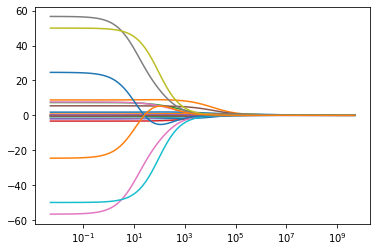

In [55]:
ax = plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale("log")

Farklı lambda değerlerine göre farklı katsayı değerlerini gözlemledik. Görülüyor ki lambda değeri arttıkça katsayıları sıfıra doğru yaklaştırmıştır. Ridge regresyon anlamsız parametreleri sıfıra yaklaştırır. Bu katsayılar öyle bi yerde durmalı ki hatayı minimum yapmalı.

### Tahmin

In [56]:
ridge_model

Ridge(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [57]:
y_pred = ridge_model.predict(X_train)

In [58]:
y_pred[:10]

array([ 377.44192985,  802.19825424,  495.61126134,  112.53243556,
        426.21984125, 1004.23434772,  154.72662778,  362.55953198,
        485.3713619 ,  918.71022606])

In [59]:
y_train[:10]

183     125.0
229    1940.0
286     940.0
102     375.0
153     100.0
320     960.0
135      90.0
213     100.0
308     750.0
161     657.0
Name: Salary, dtype: float64

In [61]:
#train hatası
RMSE = np.sqrt(mean_squared_error(y_train, y_pred))
RMSE

289.32928268083657

In [63]:
# cross validation
from sklearn.model_selection import cross_val_score
np.sqrt(np.mean(-cross_val_score(ridge_model, X_train,y_train, cv = 10, scoring="neg_mean_squared_error")))

351.8252866234261

Train hatası genellikle ilkel yolla hesaplanır.

In [64]:
#test hatası
y_pred = ridge_model.predict(X_test)

In [65]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

357.0525229756183

### Model Tuning

In [66]:
ridge_model = Ridge().fit(X_train,y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.9145881563834

In [75]:
lambdas = np.random.randint(0,1000,100)

In [76]:
lambdas2 = 10**np.linspace(10,-2,100)*0.5

In [84]:
ridgecv = RidgeCV(alphas = lambdas2, scoring="neg_mean_squared_error",cv = 10, normalize=True)

In [85]:
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [87]:
# bu model için optimum alpha değeri!!!
ridgecv.alpha_

0.7599555414764666

In [88]:
# optimum alphaya göre yeni model
ridge_tuned = Ridge(alpha=ridgecv.alpha_).fit(X_train,y_train)


In [91]:
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.94533164319995

In [95]:
# diğer lambda setimiz için optimum alpha değeri
ridgecv = RidgeCV(alphas = lambdas, scoring="neg_mean_squared_error",cv = 10, normalize=True)
ridgecv.fit(X_train, y_train)
ridge_tuned = Ridge(alpha=ridgecv.alpha_).fit(X_train,y_train)
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.80112917490214

In [96]:
ridgecv.alpha_

2